In [17]:
import pandas as pd
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/student/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1. Exploratory data analysis


In [18]:
#!pip install chardet

"""import chardet

# Detect the encoding of the CSV file
with open('Tweets.csv', 'rb') as file:
    result = chardet.detect(file.read())
encoding = result['encoding']"""



df = pd.read_csv('Tweets.csv', nrows=500)

In [19]:
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611.0,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


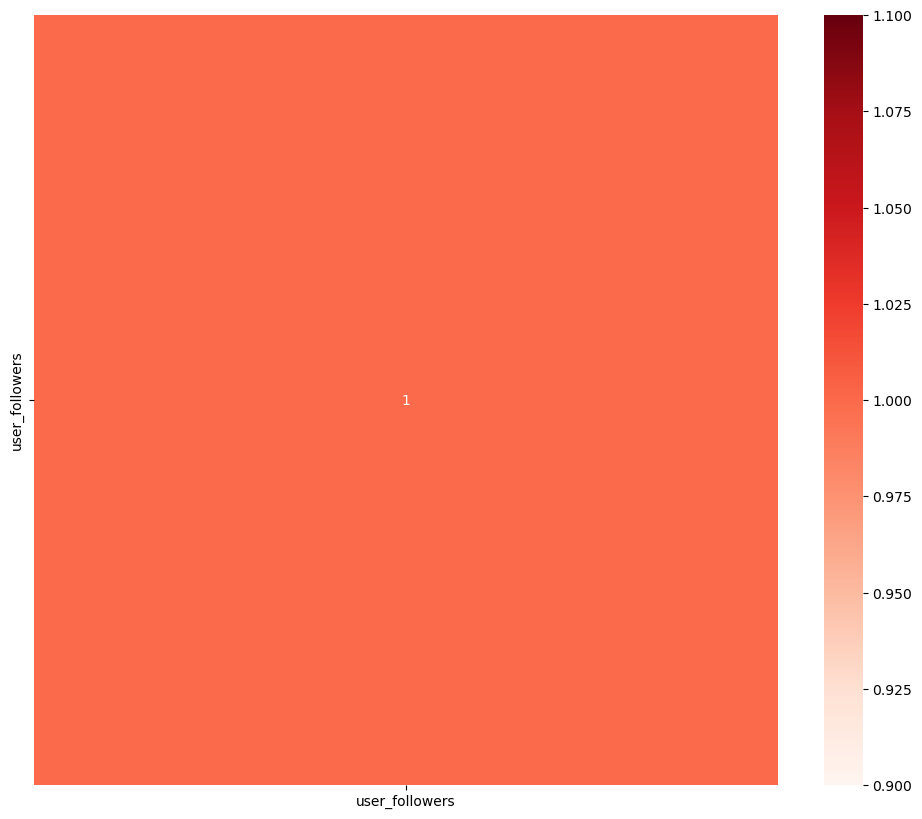

In [20]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

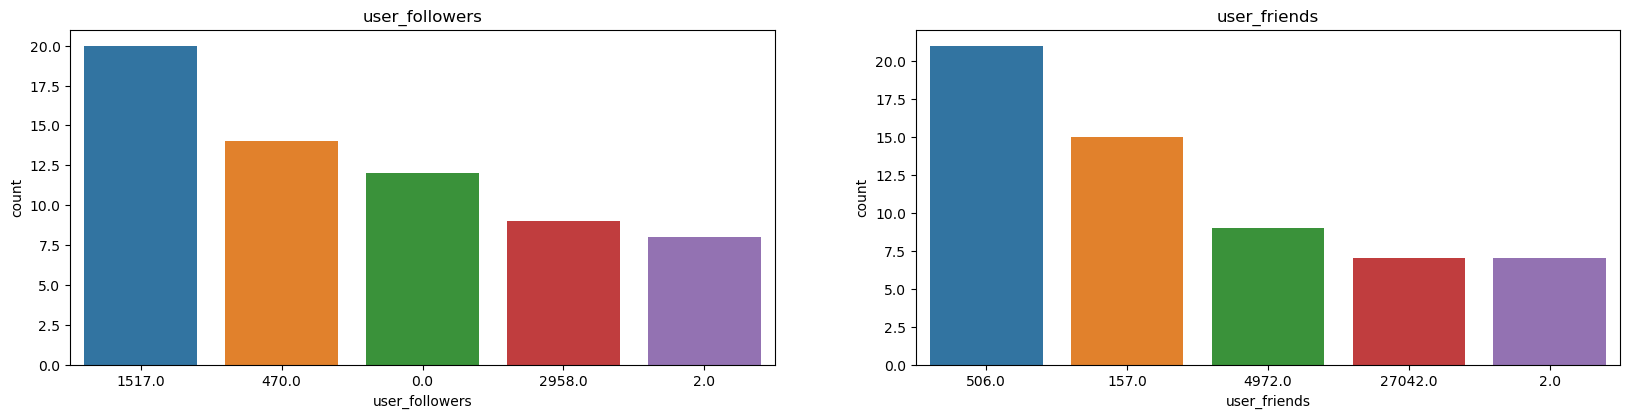

In [21]:
#CountPlot or Barcharts
import matplotlib.pyplot as plt
import seaborn as sns
features = ['user_followers',
            'user_friends']
fig = plt.figure(figsize = (20, 20))
for i in range(len(features)):
    plt.subplot(4,2, i+1)
    sns.countplot(data=df, x=features[i], order=df[features[i]].value_counts().index[:5])
    plt.title(features[i])

/var/folders/yr/dg2_6kpn6qv4zdbqklqh2jy80000gn/T/ipykernel_1875/1629636769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"][i] = df["date"][i+1]


ConversionError: Failed to convert value(s) to axis units: array([NaT, Timestamp('2023-05-17 18:11:03+0000', tz='UTC'),
       Timestamp('2023-05-17 18:11:03+0000', tz='UTC'),
       Timestamp('2023-05-17 18:10:25+0000', tz='UTC'),
       Timestamp('2023-05-17 18:09:39+0000', tz='UTC'),
       Timestamp('2023-05-17 18:09:14+0000', tz='UTC'),
       Timestamp('2023-05-17 18:09:04+0000', tz='UTC'),
       Timestamp('2023-05-17 18:09:00+0000', tz='UTC'),
       Timestamp('2023-05-17 18:08:56+0000', tz='UTC'),
       Timestamp('2023-05-17 18:08:54+0000', tz='UTC'),
       Timestamp('2023-05-17 18:08:36+0000', tz='UTC'),
       Timestamp('2023-05-17 18:07:56+0000', tz='UTC'),
       Timestamp('2023-05-17 18:07:39+0000', tz='UTC'),
       Timestamp('2023-05-17 18:07:24+0000', tz='UTC'),
       Timestamp('2023-05-17 18:07:18+0000', tz='UTC'),
       Timestamp('2023-05-17 18:06:41+0000', tz='UTC'),
       Timestamp('2023-05-17 18:06:27+0000', tz='UTC'),
       Timestamp('2023-05-17 18:06:26+0000', tz='UTC'),
       Timestamp('2023-05-17 18:06:06+0000', tz='UTC'),
       Timestamp('2023-05-17 18:06:05+0000', tz='UTC'),
       Timestamp('2023-05-17 18:05:11+0000', tz='UTC'),
       Timestamp('2023-05-17 18:04:32+0000', tz='UTC'),
       Timestamp('2023-05-17 18:04:17+0000', tz='UTC'),
       Timestamp('2023-05-17 18:04:16+0000', tz='UTC'),
       Timestamp('2023-05-17 18:03:58+0000', tz='UTC'),
       Timestamp('2023-05-17 18:03:52+0000', tz='UTC'),
       Timestamp('2023-05-17 18:03:43+0000', tz='UTC'),
       Timestamp('2023-05-17 18:03:32+0000', tz='UTC'),
       Timestamp('2023-05-17 18:03:05+0000', tz='UTC'),
       Timestamp('2023-05-17 18:03:05+0000', tz='UTC'),
       Timestamp('2023-05-17 18:02:41+0000', tz='UTC'),
       Timestamp('2023-05-17 18:02:23+0000', tz='UTC'),
       Timestamp('2023-05-17 18:02:17+0000', tz='UTC'),
       Timestamp('2023-05-17 18:02:15+0000', tz='UTC'),
       Timestamp('2023-05-17 18:01:30+0000', tz='UTC'),
       Timestamp('2023-05-17 18:01:17+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:43+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:40+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:37+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:27+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:23+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:18+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:17+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:17+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:17+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:03+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:02+0000', tz='UTC'),
       Timestamp('2023-05-17 18:00:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:59:59+0000', tz='UTC'),
       Timestamp('2023-05-17 17:59:20+0000', tz='UTC'),
       Timestamp('2023-05-17 17:59:11+0000', tz='UTC'),
       Timestamp('2023-05-17 17:58:36+0000', tz='UTC'),
       Timestamp('2023-05-17 17:58:28+0000', tz='UTC'),
       Timestamp('2023-05-17 17:58:19+0000', tz='UTC'),
       Timestamp('2023-05-17 17:58:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:57:48+0000', tz='UTC'),
       Timestamp('2023-05-17 17:57:44+0000', tz='UTC'),
       Timestamp('2023-05-17 17:57:34+0000', tz='UTC'),
       Timestamp('2023-05-17 17:57:16+0000', tz='UTC'),
       Timestamp('2023-05-17 17:57:02+0000', tz='UTC'),
       Timestamp('2023-05-17 17:56:06+0000', tz='UTC'),
       Timestamp('2023-05-17 17:56:06+0000', tz='UTC'),
       Timestamp('2023-05-17 17:56:03+0000', tz='UTC'),
       Timestamp('2023-05-17 17:56:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:55:53+0000', tz='UTC'),
       Timestamp('2023-05-17 17:55:32+0000', tz='UTC'),
       Timestamp('2023-05-17 17:55:25+0000', tz='UTC'),
       Timestamp('2023-05-17 17:54:56+0000', tz='UTC'),
       Timestamp('2023-05-17 17:54:43+0000', tz='UTC'),
       Timestamp('2023-05-17 17:54:25+0000', tz='UTC'),
       Timestamp('2023-05-17 17:54:15+0000', tz='UTC'),
       Timestamp('2023-05-17 17:54:14+0000', tz='UTC'),
       Timestamp('2023-05-17 17:54:04+0000', tz='UTC'),
       Timestamp('2023-05-17 17:53:54+0000', tz='UTC'),
       Timestamp('2023-05-17 17:53:53+0000', tz='UTC'),
       Timestamp('2023-05-17 17:53:50+0000', tz='UTC'),
       Timestamp('2023-05-17 17:53:50+0000', tz='UTC'),
       Timestamp('2023-05-17 17:53:40+0000', tz='UTC'),
       Timestamp('2023-05-17 17:53:25+0000', tz='UTC'),
       Timestamp('2023-05-17 17:53:08+0000', tz='UTC'),
       Timestamp('2023-05-17 17:53:07+0000', tz='UTC'),
       Timestamp('2023-05-17 17:52:06+0000', tz='UTC'),
       Timestamp('2023-05-17 17:52:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:51:52+0000', tz='UTC'),
       Timestamp('2023-05-17 17:51:31+0000', tz='UTC'),
       Timestamp('2023-05-17 17:50:28+0000', tz='UTC'),
       Timestamp('2023-05-17 17:50:14+0000', tz='UTC'),
       Timestamp('2023-05-17 17:50:13+0000', tz='UTC'),
       Timestamp('2023-05-17 17:50:08+0000', tz='UTC'),
       Timestamp('2023-05-17 17:49:53+0000', tz='UTC'),
       Timestamp('2023-05-17 17:49:36+0000', tz='UTC'),
       Timestamp('2023-05-17 17:49:35+0000', tz='UTC'),
       Timestamp('2023-05-17 17:49:17+0000', tz='UTC'),
       Timestamp('2023-05-17 17:48:35+0000', tz='UTC'),
       Timestamp('2023-05-17 17:48:28+0000', tz='UTC'),
       Timestamp('2023-05-17 17:48:17+0000', tz='UTC'),
       Timestamp('2023-05-17 17:48:12+0000', tz='UTC'),
       Timestamp('2023-05-17 17:48:05+0000', tz='UTC'),
       Timestamp('2023-05-17 17:47:37+0000', tz='UTC'),
       Timestamp('2023-05-17 17:47:20+0000', tz='UTC'),
       Timestamp('2023-05-17 17:47:11+0000', tz='UTC'),
       Timestamp('2023-05-17 17:46:44+0000', tz='UTC'),
       Timestamp('2023-05-17 17:45:41+0000', tz='UTC'),
       Timestamp('2023-05-17 17:45:25+0000', tz='UTC'),
       Timestamp('2023-05-17 17:45:23+0000', tz='UTC'),
       Timestamp('2023-05-17 17:45:10+0000', tz='UTC'),
       Timestamp('2023-05-17 17:44:28+0000', tz='UTC'),
       Timestamp('2023-05-17 17:44:12+0000', tz='UTC'),
       Timestamp('2023-05-17 17:43:52+0000', tz='UTC'),
       Timestamp('2023-05-17 17:43:42+0000', tz='UTC'),
       Timestamp('2023-05-17 17:43:20+0000', tz='UTC'),
       Timestamp('2023-05-17 17:43:16+0000', tz='UTC'),
       Timestamp('2023-05-17 17:43:02+0000', tz='UTC'),
       Timestamp('2023-05-17 17:42:20+0000', tz='UTC'),
       Timestamp('2023-05-17 17:41:44+0000', tz='UTC'),
       Timestamp('2023-05-17 17:41:26+0000', tz='UTC'),
       Timestamp('2023-05-17 17:41:11+0000', tz='UTC'),
       Timestamp('2023-05-17 17:40:36+0000', tz='UTC'),
       Timestamp('2023-05-17 17:40:07+0000', tz='UTC'),
       Timestamp('2023-05-17 17:39:56+0000', tz='UTC'),
       Timestamp('2023-05-17 17:38:49+0000', tz='UTC'),
       Timestamp('2023-05-17 17:38:44+0000', tz='UTC'),
       Timestamp('2023-05-17 17:38:44+0000', tz='UTC'),
       Timestamp('2023-05-17 17:38:43+0000', tz='UTC'),
       Timestamp('2023-05-17 17:38:39+0000', tz='UTC'),
       Timestamp('2023-05-17 17:38:24+0000', tz='UTC'),
       Timestamp('2023-05-17 17:38:22+0000', tz='UTC'),
       Timestamp('2023-05-17 17:38:20+0000', tz='UTC'),
       Timestamp('2023-05-17 17:37:22+0000', tz='UTC'),
       Timestamp('2023-05-17 17:37:16+0000', tz='UTC'),
       Timestamp('2023-05-17 17:37:10+0000', tz='UTC'),
       Timestamp('2023-05-17 17:37:04+0000', tz='UTC'),
       Timestamp('2023-05-17 17:37:03+0000', tz='UTC'),
       Timestamp('2023-05-17 17:36:31+0000', tz='UTC'),
       Timestamp('2023-05-17 17:36:04+0000', tz='UTC'),
       Timestamp('2023-05-17 17:36:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:35:40+0000', tz='UTC'),
       Timestamp('2023-05-17 17:35:17+0000', tz='UTC'),
       Timestamp('2023-05-17 17:34:58+0000', tz='UTC'),
       Timestamp('2023-05-17 17:34:42+0000', tz='UTC'),
       Timestamp('2023-05-17 17:31:16+0000', tz='UTC'),
       Timestamp('2023-05-17 17:31:05+0000', tz='UTC'),
       Timestamp('2023-05-17 17:30:44+0000', tz='UTC'),
       Timestamp('2023-05-17 17:30:35+0000', tz='UTC'),
       Timestamp('2023-05-17 17:30:28+0000', tz='UTC'),
       Timestamp('2023-05-17 17:30:13+0000', tz='UTC'),
       Timestamp('2023-05-17 17:30:12+0000', tz='UTC'),
       Timestamp('2023-05-17 17:30:08+0000', tz='UTC'),
       Timestamp('2023-05-17 17:30:08+0000', tz='UTC'),
       Timestamp('2023-05-17 17:30:01+0000', tz='UTC'),
       Timestamp('2023-05-17 17:30:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:29:58+0000', tz='UTC'),
       Timestamp('2023-05-17 17:29:30+0000', tz='UTC'),
       Timestamp('2023-05-17 17:28:37+0000', tz='UTC'),
       Timestamp('2023-05-17 17:28:27+0000', tz='UTC'),
       Timestamp('2023-05-17 17:28:26+0000', tz='UTC'),
       Timestamp('2023-05-17 17:28:04+0000', tz='UTC'),
       Timestamp('2023-05-17 17:27:54+0000', tz='UTC'),
       Timestamp('2023-05-17 17:27:20+0000', tz='UTC'),
       Timestamp('2023-05-17 17:27:18+0000', tz='UTC'),
       Timestamp('2023-05-17 17:27:03+0000', tz='UTC'),
       Timestamp('2023-05-17 17:27:01+0000', tz='UTC'),
       Timestamp('2023-05-17 17:26:40+0000', tz='UTC'),
       Timestamp('2023-05-17 17:26:28+0000', tz='UTC'),
       Timestamp('2023-05-17 17:26:23+0000', tz='UTC'),
       Timestamp('2023-05-17 17:26:19+0000', tz='UTC'),
       Timestamp('2023-05-17 17:25:58+0000', tz='UTC'),
       Timestamp('2023-05-17 17:25:53+0000', tz='UTC'),
       Timestamp('2023-05-17 17:25:33+0000', tz='UTC'),
       Timestamp('2023-05-17 17:25:24+0000', tz='UTC'),
       Timestamp('2023-05-17 17:24:53+0000', tz='UTC'),
       Timestamp('2023-05-17 17:24:44+0000', tz='UTC'),
       Timestamp('2023-05-17 17:24:15+0000', tz='UTC'),
       Timestamp('2023-05-17 17:24:14+0000', tz='UTC'),
       Timestamp('2023-05-17 17:24:01+0000', tz='UTC'),
       Timestamp('2023-05-17 17:23:51+0000', tz='UTC'),
       Timestamp('2023-05-17 17:23:23+0000', tz='UTC'),
       Timestamp('2023-05-17 17:21:39+0000', tz='UTC'),
       Timestamp('2023-05-17 17:21:30+0000', tz='UTC'),
       Timestamp('2023-05-17 17:21:16+0000', tz='UTC'),
       Timestamp('2023-05-17 17:20:40+0000', tz='UTC'),
       Timestamp('2023-05-17 17:20:11+0000', tz='UTC'),
       Timestamp('2023-05-17 17:20:11+0000', tz='UTC'),
       Timestamp('2023-05-17 17:20:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:19:57+0000', tz='UTC'),
       Timestamp('2023-05-17 17:19:42+0000', tz='UTC'),
       Timestamp('2023-05-17 17:19:17+0000', tz='UTC'),
       Timestamp('2023-05-17 17:19:04+0000', tz='UTC'),
       Timestamp('2023-05-17 17:18:56+0000', tz='UTC'),
       Timestamp('2023-05-17 17:18:28+0000', tz='UTC'),
       Timestamp('2023-05-17 17:18:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:17:54+0000', tz='UTC'),
       Timestamp('2023-05-17 17:17:26+0000', tz='UTC'),
       Timestamp('2023-05-17 17:16:51+0000', tz='UTC'),
       Timestamp('2023-05-17 17:16:11+0000', tz='UTC'),
       Timestamp('2023-05-17 17:16:04+0000', tz='UTC'),
       Timestamp('2023-05-17 17:16:04+0000', tz='UTC'),
       Timestamp('2023-05-17 17:15:43+0000', tz='UTC'),
       Timestamp('2023-05-17 17:14:14+0000', tz='UTC'),
       Timestamp('2023-05-17 17:13:32+0000', tz='UTC'),
       Timestamp('2023-05-17 17:12:57+0000', tz='UTC'),
       Timestamp('2023-05-17 17:12:29+0000', tz='UTC'),
       Timestamp('2023-05-17 17:12:29+0000', tz='UTC'),
       Timestamp('2023-05-17 17:12:28+0000', tz='UTC'),
       Timestamp('2023-05-17 17:12:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:12:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:11:50+0000', tz='UTC'),
       Timestamp('2023-05-17 17:11:08+0000', tz='UTC'),
       Timestamp('2023-05-17 17:11:06+0000', tz='UTC'),
       Timestamp('2023-05-17 17:11:04+0000', tz='UTC'),
       Timestamp('2023-05-17 17:10:34+0000', tz='UTC'),
       Timestamp('2023-05-17 17:10:28+0000', tz='UTC'),
       Timestamp('2023-05-17 17:10:19+0000', tz='UTC'),
       Timestamp('2023-05-17 17:10:13+0000', tz='UTC'),
       Timestamp('2023-05-17 17:10:12+0000', tz='UTC'),
       Timestamp('2023-05-17 17:09:55+0000', tz='UTC'),
       Timestamp('2023-05-17 17:09:53+0000', tz='UTC'),
       Timestamp('2023-05-17 17:09:48+0000', tz='UTC'),
       Timestamp('2023-05-17 17:09:23+0000', tz='UTC'),
       Timestamp('2023-05-17 17:08:03+0000', tz='UTC'),
       Timestamp('2023-05-17 17:08:02+0000', tz='UTC'),
       Timestamp('2023-05-17 17:07:33+0000', tz='UTC'),
       Timestamp('2023-05-17 17:07:09+0000', tz='UTC'),
       Timestamp('2023-05-17 17:07:04+0000', tz='UTC'),
       Timestamp('2023-05-17 17:06:41+0000', tz='UTC'),
       Timestamp('2023-05-17 17:06:31+0000', tz='UTC'),
       Timestamp('2023-05-17 17:06:12+0000', tz='UTC'),
       Timestamp('2023-05-17 17:05:46+0000', tz='UTC'),
       Timestamp('2023-05-17 17:04:59+0000', tz='UTC'),
       Timestamp('2023-05-17 17:04:32+0000', tz='UTC'),
       Timestamp('2023-05-17 17:04:32+0000', tz='UTC'),
       Timestamp('2023-05-17 17:04:26+0000', tz='UTC'),
       Timestamp('2023-05-17 17:04:15+0000', tz='UTC'),
       Timestamp('2023-05-17 17:04:09+0000', tz='UTC'),
       Timestamp('2023-05-17 17:04:06+0000', tz='UTC'),
       Timestamp('2023-05-17 17:03:50+0000', tz='UTC'),
       Timestamp('2023-05-17 17:03:28+0000', tz='UTC'),
       Timestamp('2023-05-17 17:02:35+0000', tz='UTC'),
       Timestamp('2023-05-17 17:02:33+0000', tz='UTC'),
       Timestamp('2023-05-17 17:02:14+0000', tz='UTC'),
       Timestamp('2023-05-17 17:02:09+0000', tz='UTC'),
       Timestamp('2023-05-17 17:02:01+0000', tz='UTC'),
       Timestamp('2023-05-17 17:01:54+0000', tz='UTC'),
       Timestamp('2023-05-17 17:01:48+0000', tz='UTC'),
       Timestamp('2023-05-17 17:01:43+0000', tz='UTC'),
       Timestamp('2023-05-17 17:01:39+0000', tz='UTC'),
       Timestamp('2023-05-17 17:01:19+0000', tz='UTC'),
       Timestamp('2023-05-17 17:01:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:01:00+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:49+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:48+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:46+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:38+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:38+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:30+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:28+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:25+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:22+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:05+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:05+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:02+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:02+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:01+0000', tz='UTC'),
       Timestamp('2023-05-17 17:00:01+0000', tz='UTC'),
       Timestamp('2023-05-17 16:59:46+0000', tz='UTC'),
       Timestamp('2023-05-17 16:59:36+0000', tz='UTC'),
       Timestamp('2023-05-17 16:59:11+0000', tz='UTC'),
       Timestamp('2023-05-17 16:59:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:58:34+0000', tz='UTC'),
       Timestamp('2023-05-17 16:57:41+0000', tz='UTC'),
       Timestamp('2023-05-17 16:57:31+0000', tz='UTC'),
       Timestamp('2023-05-17 16:57:20+0000', tz='UTC'),
       Timestamp('2023-05-17 16:57:19+0000', tz='UTC'),
       Timestamp('2023-05-17 16:57:19+0000', tz='UTC'),
       Timestamp('2023-05-17 16:57:10+0000', tz='UTC'),
       Timestamp('2023-05-17 16:56:50+0000', tz='UTC'),
       Timestamp('2023-05-17 16:56:14+0000', tz='UTC'),
       Timestamp('2023-05-17 16:55:45+0000', tz='UTC'),
       Timestamp('2023-05-17 16:55:15+0000', tz='UTC'),
       Timestamp('2023-05-17 16:55:10+0000', tz='UTC'),
       Timestamp('2023-05-17 16:54:29+0000', tz='UTC'),
       Timestamp('2023-05-17 16:54:14+0000', tz='UTC'),
       Timestamp('2023-05-17 16:53:36+0000', tz='UTC'),
       Timestamp('2023-05-17 16:52:32+0000', tz='UTC'),
       Timestamp('2023-05-17 16:52:28+0000', tz='UTC'),
       Timestamp('2023-05-17 16:52:22+0000', tz='UTC'),
       Timestamp('2023-05-17 16:52:18+0000', tz='UTC'),
       Timestamp('2023-05-17 16:52:14+0000', tz='UTC'),
       Timestamp('2023-05-17 16:52:02+0000', tz='UTC'),
       Timestamp('2023-05-17 16:51:54+0000', tz='UTC'),
       Timestamp('2023-05-17 16:50:13+0000', tz='UTC'),
       Timestamp('2023-05-17 16:50:12+0000', tz='UTC'),
       Timestamp('2023-05-17 16:50:08+0000', tz='UTC'),
       Timestamp('2023-05-17 16:50:06+0000', tz='UTC'),
       Timestamp('2023-05-17 16:50:06+0000', tz='UTC'),
       Timestamp('2023-05-17 16:50:05+0000', tz='UTC'),
       Timestamp('2023-05-17 16:49:33+0000', tz='UTC'),
       Timestamp('2023-05-17 16:48:36+0000', tz='UTC'),
       Timestamp('2023-05-17 16:48:29+0000', tz='UTC'),
       Timestamp('2023-05-17 16:48:16+0000', tz='UTC'),
       Timestamp('2023-05-17 16:48:07+0000', tz='UTC'),
       Timestamp('2023-05-17 16:47:55+0000', tz='UTC'),
       Timestamp('2023-05-17 16:47:39+0000', tz='UTC'),
       Timestamp('2023-05-17 16:47:38+0000', tz='UTC'),
       Timestamp('2023-05-17 16:47:30+0000', tz='UTC'),
       Timestamp('2023-05-17 16:47:27+0000', tz='UTC'),
       Timestamp('2023-05-17 16:47:20+0000', tz='UTC'),
       Timestamp('2023-05-17 16:46:58+0000', tz='UTC'),
       Timestamp('2023-05-17 16:46:18+0000', tz='UTC'),
       Timestamp('2023-05-17 16:45:50+0000', tz='UTC'),
       Timestamp('2023-05-17 16:45:17+0000', tz='UTC'),
       Timestamp('2023-05-17 16:45:09+0000', tz='UTC'),
       Timestamp('2023-05-17 16:45:07+0000', tz='UTC'),
       Timestamp('2023-05-17 16:45:02+0000', tz='UTC'),
       Timestamp('2023-05-17 16:44:45+0000', tz='UTC'),
       Timestamp('2023-05-17 16:44:15+0000', tz='UTC'),
       Timestamp('2023-05-17 16:44:11+0000', tz='UTC'),
       Timestamp('2023-05-17 16:43:57+0000', tz='UTC'),
       Timestamp('2023-05-17 16:43:50+0000', tz='UTC'),
       Timestamp('2023-05-17 16:43:47+0000', tz='UTC'),
       Timestamp('2023-05-17 16:43:33+0000', tz='UTC'),
       Timestamp('2023-05-17 16:43:16+0000', tz='UTC'),
       Timestamp('2023-05-17 16:43:03+0000', tz='UTC'),
       Timestamp('2023-05-17 16:42:29+0000', tz='UTC'),
       Timestamp('2023-05-17 16:42:29+0000', tz='UTC'),
       Timestamp('2023-05-17 16:42:08+0000', tz='UTC'),
       Timestamp('2023-05-17 16:41:57+0000', tz='UTC'),
       Timestamp('2023-05-17 16:41:21+0000', tz='UTC'),
       Timestamp('2023-05-17 16:41:01+0000', tz='UTC'),
       Timestamp('2023-05-17 16:40:57+0000', tz='UTC'),
       Timestamp('2023-05-17 16:40:04+0000', tz='UTC'),
       Timestamp('2023-05-17 16:40:01+0000', tz='UTC'),
       Timestamp('2023-05-17 16:39:40+0000', tz='UTC'),
       Timestamp('2023-05-17 16:39:34+0000', tz='UTC'),
       Timestamp('2023-05-17 16:39:32+0000', tz='UTC'),
       Timestamp('2023-05-17 16:39:22+0000', tz='UTC'),
       Timestamp('2023-05-17 16:39:17+0000', tz='UTC'),
       Timestamp('2023-05-17 16:38:57+0000', tz='UTC'),
       Timestamp('2023-05-17 16:38:55+0000', tz='UTC'),
       Timestamp('2023-05-17 16:38:51+0000', tz='UTC'),
       Timestamp('2023-05-17 16:38:37+0000', tz='UTC'),
       Timestamp('2023-05-17 16:38:36+0000', tz='UTC'),
       Timestamp('2023-05-17 16:38:31+0000', tz='UTC'),
       Timestamp('2023-05-17 16:38:27+0000', tz='UTC'),
       Timestamp('2023-05-17 16:38:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:37:40+0000', tz='UTC'),
       Timestamp('2023-05-17 16:37:31+0000', tz='UTC'),
       Timestamp('2023-05-17 16:37:12+0000', tz='UTC'),
       Timestamp('2023-05-17 16:37:11+0000', tz='UTC'),
       Timestamp('2023-05-17 16:37:04+0000', tz='UTC'),
       Timestamp('2023-05-17 16:36:52+0000', tz='UTC'),
       Timestamp('2023-05-17 16:36:33+0000', tz='UTC'),
       Timestamp('2023-05-17 16:36:22+0000', tz='UTC'),
       Timestamp('2023-05-17 16:36:12+0000', tz='UTC'),
       Timestamp('2023-05-17 16:36:05+0000', tz='UTC'),
       Timestamp('2023-05-17 16:35:25+0000', tz='UTC'),
       Timestamp('2023-05-17 16:35:18+0000', tz='UTC'),
       Timestamp('2023-05-17 16:35:10+0000', tz='UTC'),
       Timestamp('2023-05-17 16:35:08+0000', tz='UTC'),
       Timestamp('2023-05-17 16:35:06+0000', tz='UTC'),
       Timestamp('2023-05-17 16:34:33+0000', tz='UTC'),
       Timestamp('2023-05-17 16:34:18+0000', tz='UTC'),
       Timestamp('2023-05-17 16:34:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:33:27+0000', tz='UTC'),
       Timestamp('2023-05-17 16:33:18+0000', tz='UTC'),
       Timestamp('2023-05-17 16:33:17+0000', tz='UTC'),
       Timestamp('2023-05-17 16:33:08+0000', tz='UTC'),
       Timestamp('2023-05-17 16:32:47+0000', tz='UTC'),
       Timestamp('2023-05-17 16:32:41+0000', tz='UTC'),
       Timestamp('2023-05-17 16:32:39+0000', tz='UTC'),
       Timestamp('2023-05-17 16:32:15+0000', tz='UTC'),
       Timestamp('2023-05-17 16:31:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:31:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:30:39+0000', tz='UTC'),
       Timestamp('2023-05-17 16:30:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:30:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:28:55+0000', tz='UTC'),
       Timestamp('2023-05-17 16:28:24+0000', tz='UTC'),
       Timestamp('2023-05-17 16:28:07+0000', tz='UTC'),
       Timestamp('2023-05-17 16:28:06+0000', tz='UTC'),
       Timestamp('2023-05-17 16:27:28+0000', tz='UTC'),
       Timestamp('2023-05-17 16:27:20+0000', tz='UTC'),
       Timestamp('2023-05-17 16:26:35+0000', tz='UTC'),
       Timestamp('2023-05-17 16:26:21+0000', tz='UTC'),
       Timestamp('2023-05-17 16:25:34+0000', tz='UTC'),
       Timestamp('2023-05-17 16:25:34+0000', tz='UTC'),
       Timestamp('2023-05-17 16:25:16+0000', tz='UTC'),
       Timestamp('2023-05-17 16:25:12+0000', tz='UTC'),
       Timestamp('2023-05-17 16:25:11+0000', tz='UTC'),
       Timestamp('2023-05-17 16:24:57+0000', tz='UTC'),
       Timestamp('2023-05-17 16:24:50+0000', tz='UTC'),
       Timestamp('2023-05-17 16:24:23+0000', tz='UTC'),
       Timestamp('2023-05-17 16:24:22+0000', tz='UTC'),
       Timestamp('2023-05-17 16:24:19+0000', tz='UTC'),
       Timestamp('2023-05-17 16:24:17+0000', tz='UTC'),
       Timestamp('2023-05-17 16:24:07+0000', tz='UTC'),
       Timestamp('2023-05-17 16:23:48+0000', tz='UTC'),
       Timestamp('2023-05-17 16:23:23+0000', tz='UTC'),
       Timestamp('2023-05-17 16:23:09+0000', tz='UTC'),
       Timestamp('2023-05-17 16:22:49+0000', tz='UTC'),
       Timestamp('2023-05-17 16:22:33+0000', tz='UTC'),
       Timestamp('2023-05-17 16:22:22+0000', tz='UTC'),
       Timestamp('2023-05-17 16:22:06+0000', tz='UTC'),
       Timestamp('2023-05-17 16:21:58+0000', tz='UTC'),
       Timestamp('2023-05-17 16:21:13+0000', tz='UTC'),
       Timestamp('2023-05-17 16:21:11+0000', tz='UTC'),
       Timestamp('2023-05-17 16:20:53+0000', tz='UTC'),
       Timestamp('2023-05-17 16:20:48+0000', tz='UTC'),
       Timestamp('2023-05-17 16:20:39+0000', tz='UTC'),
       Timestamp('2023-05-17 16:20:04+0000', tz='UTC'),
       Timestamp('2023-05-17 16:20:01+0000', tz='UTC'),
       Timestamp('2023-05-17 16:19:59+0000', tz='UTC'),
       Timestamp('2023-05-17 16:19:42+0000', tz='UTC'),
       Timestamp('2023-05-17 16:19:34+0000', tz='UTC'),
       Timestamp('2023-05-17 16:18:48+0000', tz='UTC'),
       Timestamp('2023-05-17 16:18:37+0000', tz='UTC'),
       Timestamp('2023-05-17 16:18:33+0000', tz='UTC'),
       Timestamp('2023-05-17 16:18:22+0000', tz='UTC'),
       Timestamp('2023-05-17 16:18:04+0000', tz='UTC'),
       Timestamp('2023-05-17 16:18:03+0000', tz='UTC'),
       Timestamp('2023-05-17 16:17:55+0000', tz='UTC'),
       Timestamp('2023-05-17 16:17:37+0000', tz='UTC'),
       Timestamp('2023-05-17 16:17:29+0000', tz='UTC'),
       Timestamp('2023-05-17 16:17:10+0000', tz='UTC'),
       Timestamp('2023-05-17 16:17:02+0000', tz='UTC'),
       Timestamp('2023-05-17 16:17:02+0000', tz='UTC'),
       Timestamp('2023-05-17 16:17:01+0000', tz='UTC'),
       Timestamp('2023-05-17 16:17:01+0000', tz='UTC'),
       Timestamp('2023-05-17 16:17:01+0000', tz='UTC'),
       Timestamp('2023-05-17 16:17:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:16:57+0000', tz='UTC'),
       Timestamp('2023-05-17 16:16:24+0000', tz='UTC'),
       Timestamp('2023-05-17 16:16:04+0000', tz='UTC'),
       Timestamp('2023-05-17 16:15:52+0000', tz='UTC'),
       Timestamp('2023-05-17 16:15:51+0000', tz='UTC'),
       Timestamp('2023-05-17 16:15:34+0000', tz='UTC'),
       Timestamp('2023-05-17 16:15:32+0000', tz='UTC'),
       Timestamp('2023-05-17 16:15:24+0000', tz='UTC'),
       Timestamp('2023-05-17 16:15:19+0000', tz='UTC'),
       Timestamp('2023-05-17 16:15:13+0000', tz='UTC'),
       Timestamp('2023-05-17 16:15:06+0000', tz='UTC'),
       Timestamp('2023-05-17 16:15:03+0000', tz='UTC'),
       Timestamp('2023-05-17 16:14:04+0000', tz='UTC'),
       Timestamp('2023-05-17 16:13:55+0000', tz='UTC'),
       Timestamp('2023-05-17 16:13:40+0000', tz='UTC'),
       Timestamp('2023-05-17 16:13:33+0000', tz='UTC'),
       Timestamp('2023-05-17 16:13:29+0000', tz='UTC'),
       Timestamp('2023-05-17 16:13:06+0000', tz='UTC'),
       Timestamp('2023-05-17 16:13:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:11:58+0000', tz='UTC'),
       Timestamp('2023-05-17 16:11:03+0000', tz='UTC'),
       Timestamp('2023-05-17 16:10:23+0000', tz='UTC'),
       Timestamp('2023-05-17 16:10:02+0000', tz='UTC'),
       Timestamp('2023-05-17 16:10:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:10:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:09:23+0000', tz='UTC'),
       Timestamp('2023-05-17 16:09:20+0000', tz='UTC'),
       Timestamp('2023-05-17 16:09:08+0000', tz='UTC'),
       Timestamp('2023-05-17 16:09:00+0000', tz='UTC'),
       Timestamp('2023-05-17 16:08:10+0000', tz='UTC'),
       Timestamp('2023-05-17 16:07:57+0000', tz='UTC'),
       Timestamp('2023-05-17 16:07:45+0000', tz='UTC'),
       Timestamp('2023-05-17 16:07:10+0000', tz='UTC'),
       Timestamp('2023-05-17 16:06:32+0000', tz='UTC'),
       Timestamp('2023-05-17 16:06:26+0000', tz='UTC'),
       Timestamp('2023-05-17 16:06:17+0000', tz='UTC'),
       Timestamp('2023-05-17 16:06:12+0000', tz='UTC'),
       Timestamp('2023-05-17 16:06:12+0000', tz='UTC'),
       Timestamp('2023-05-17 16:05:31+0000', tz='UTC'),
       Timestamp('2023-05-17 16:05:31+0000', tz='UTC'),
       Timestamp('2023-05-17 16:05:26+0000', tz='UTC'),
       Timestamp('2023-05-17 16:05:17+0000', tz='UTC'),
       Timestamp('2023-05-17 16:05:16+0000', tz='UTC'),
       Timestamp('2023-05-17 16:05:12+0000', tz='UTC'),
       Timestamp('2023-05-17 16:04:55+0000', tz='UTC'),
       Timestamp('2023-05-17 16:04:24+0000', tz='UTC'),
       Timestamp('2023-05-17 16:04:22+0000', tz='UTC'),
       Timestamp('2023-05-17 16:03:55+0000', tz='UTC'),
       Timestamp('2023-05-17 16:03:23+0000', tz='UTC'),
       Timestamp('2023-05-17 16:03:15+0000', tz='UTC'),
       Timestamp('2023-05-17 16:02:48+0000', tz='UTC'),
       Timestamp('2023-05-17 16:02:42+0000', tz='UTC'),
       Timestamp('2023-05-17 16:02:38+0000', tz='UTC'),
       Timestamp('2023-05-17 16:02:32+0000', tz='UTC'),
       Timestamp('2023-05-17 16:02:19+0000', tz='UTC'),
       Timestamp('2023-05-17 16:02:17+0000', tz='UTC'),
       Timestamp('2023-05-17 16:02:16+0000', tz='UTC'),
       Timestamp('2023-05-17 16:02:10+0000', tz='UTC'),
       Timestamp('2023-05-17 16:01:47+0000', tz='UTC'),
       Timestamp('2023-05-17 16:01:45+0000', tz='UTC'),
       Timestamp('2023-05-17 16:01:39+0000', tz='UTC'),
       Timestamp('2023-05-17 16:01:39+0000', tz='UTC'),
       Timestamp('2023-05-17 16:01:21+0000', tz='UTC'),
       Timestamp('2023-05-17 16:00:54+0000', tz='UTC'),
       Timestamp('2023-05-17 16:00:40+0000', tz='UTC'),
       Timestamp('2023-05-17 16:00:37+0000', tz='UTC'),
       Timestamp('2023-05-17 16:00:37+0000', tz='UTC'),
       Timestamp('2023-05-17 16:00:30+0000', tz='UTC'),
       Timestamp('2023-05-17 16:00:28+0000', tz='UTC'),
       Timestamp('2023-05-17 16:00:26+0000', tz='UTC')], dtype=object)

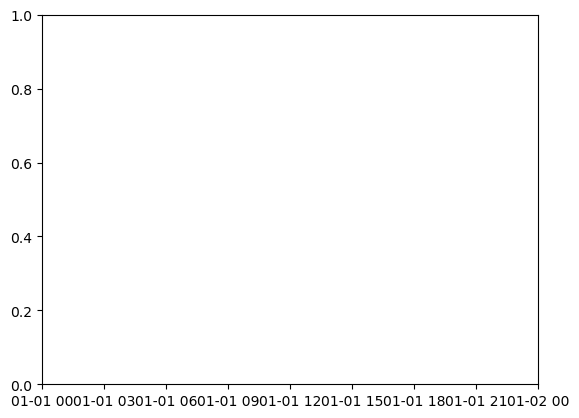

In [22]:
for i in range(0,len(df["date"])):
    if df["date"][i] == 'Twitter Web App':
        df["date"][i] = df["date"][i+1]
        
df['date'] = pd.to_datetime(df['date'],format = '%Y-%m-%d %H:%M')

plt.hist(df['date'], bins=24, edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.title('Tweets Posted Time Range')
plt.xticks(rotation=90)

plt.show()

## 2. PreProcessing & cleaning 

In [23]:
tweets = pd.DataFrame()
tweets = df.iloc[:, 1]
tweets

0      #GPT4 for FREE. \nNo its not a clickbait, @Qol...
1                                          AI enthusiast
2      ChatGPT Thinks These 5 Crypto Coins Will Explo...
3      New: @JWVance's post about 5 #startups (includ...
4      🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...
                             ...                        
495    #ChatGPT set off an endless stream of fear and...
496    ChatGPT is a hot topic; there is no doubt. It ...
497    Exciting news! #chatGPT has launched its Plugi...
498    @Oncrawl Agreed! The #ChatGPT is definitely th...
499    Do you agree whatever is put on the internet d...
Name: text, Length: 500, dtype: object

In [24]:
# remove missing value rows
tweets = tweets.dropna(axis=0)
# Remove duplicates
tweets =  tweets.drop_duplicates(keep='first')
tweets

0      #GPT4 for FREE. \nNo its not a clickbait, @Qol...
1                                          AI enthusiast
2      ChatGPT Thinks These 5 Crypto Coins Will Explo...
3      New: @JWVance's post about 5 #startups (includ...
4      🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...
                             ...                        
495    #ChatGPT set off an endless stream of fear and...
496    ChatGPT is a hot topic; there is no doubt. It ...
497    Exciting news! #chatGPT has launched its Plugi...
498    @Oncrawl Agreed! The #ChatGPT is definitely th...
499    Do you agree whatever is put on the internet d...
Name: text, Length: 496, dtype: object

In [25]:


def preprocess(tweet):
    

  
    #remove punctuations 
    tweet = re.sub(r'[^\w\s]', '', tweet)
    
    # remove #?@\/ etc
    tweet = re.sub(r'[#?@/\\!]', '', tweet)

    # Step 2: Remove URLs
    tweet =  re.sub(r'https?://\S+|www\.\S+', '', tweet)

    # Step 3: Convert emojis
    tweet = emoji.demojize(tweet)

    # Step 4: Tokenization
    tokens = nltk.word_tokenize(tweet)

    # Step 5: Remove stop words
   
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Step 6: Stemming
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Step 7: Lemmatization
    
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    

    
    
    filtered_tweet = ' '.join(filtered_tokens)
    return filtered_tweet


    


In [26]:

processed_tweets = tweets.apply(preprocess)


In [27]:
print("-------Preprocessed and cleaned data---------\n\n\n\n")
processed_tweets

-------Preprocessed and cleaned data---------






0      gpt4 free clickbait qolaba studio chatbot powe...
1                                          ai enthusiast
2      chatgpt think 5 crypto coin explod year yahoo ...
3      new jwvanc post 5 startup includ vcinityinc 1s...
4      get binanc spot recommend short ticker ghstusd...
                             ...                        
495    chatgpt set endless stream fear despair closer...
496    chatgpt hot topic doubt chang write publish so...
497    excit news chatgpt launch plugin store mark co...
498    oncrawl agre chatgpt definit superior chatbot ...
499    agre whatev put internet doesnt go away watch ...
Name: text, Length: 496, dtype: object

## 3. N-gram analysis

In [28]:
from nltk.util import ngrams
from collections import Counter
def get_ngrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [29]:

bi_grams = get_ngrams(processed_tweets,2)
print("----15 most common bi grams-----\n\n")
bi_grams

----15 most common bi grams-----




,words,count
86,long wait,15
70,time interv,15
65,spot recommend,15
85,na long,15
34,ai openai,16
84,gon na,17
67,short ticker,18
66,recommend short,18
73,last price,20
200,openai chatgpt,25


In [30]:
tri_grams = get_ngrams(processed_tweets,3)
print("----15 most common tri grams-----\n\n")
tri_grams

----15 most common tri grams-----




,words,count
3287,microsoft googl autogpt,7
3282,gpt4 chatgpt openai,7
142,sell binanc spot,7
3284,openai ai generativeai,7
3283,chatgpt openai ai,9
67,time interv 5min,14
68,interv 5min last,14
69,5min last price,14
32,chatgpt ai openai,14
61,binanc spot recommend,15


## 4. sentiment analysis

In [31]:
import pandas as pd
from textblob import TextBlob


def get_sentiment(tweet):
    blob = TextBlob(tweet)
    sentiment = blob.sentiment
    if blob.sentiment.polarity > 0:
        sentiment = 1
    elif blob.sentiment.polarity < 0:
        sentiment  = -1
    else: 
        sentiment = 0
    
    return sentiment




sentiments = processed_tweets.apply(get_sentiment)

sentiments

0      1
1      0
2      0
3     -1
4     -1
      ..
495   -1
496    1
497    1
498    1
499    1
Name: text, Length: 496, dtype: int64

In [32]:
tweet_sent =pd.DataFrame( {'Processed tweets' : processed_tweets,
                                'sentiment' : sentiments})
tweet_sent

,Processed tweets,sentiment
0,gpt4 free clickbait qolaba studio chatbot powe...,1
1,ai enthusiast,0
2,chatgpt think 5 crypto coin explod year yahoo ...,0
3,new jwvanc post 5 startup includ vcinityinc 1s...,-1
4,get binanc spot recommend short ticker ghstusd...,-1
...,...,...
495,chatgpt set endless stream fear despair closer...,-1
496,chatgpt hot topic doubt chang write publish so...,1
497,excit news chatgpt launch plugin store mark co...,1
498,oncrawl agre chatgpt definit superior chatbot ...,1


### setting up RoBERTa

In [33]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [34]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [35]:
def polarity_scores_roberta(exp):
    encoded_text = tokenizer(exp, return_tensors="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict = {
        "roberta_neg" : scores [0],
        "roberta_neu" : scores[1],
        "roberta_pos" : scores[2]
    }
    return (scores_dict)

In [36]:
Roberta = processed_tweets.apply(polarity_scores_roberta)




""""from tqdm.notebook import tqdm
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text= row["Text"]
        myid= row["Id"]
        roberta_result = polarity_scores_roberta(text)
    except RuntimeError:
        print(f"Broke for id {myid}")"""

'"from tqdm.notebook import tqdm\nres={}\nfor i, row in tqdm(df.iterrows(), total=len(df)):\n    try:\n        text= row["Text"]\n        myid= row["Id"]\n        roberta_result = polarity_scores_roberta(text)\n    except RuntimeError:\n        print(f"Broke for id {myid}")'

In [37]:
Roberta

0      {'roberta_neg': 0.017567456, 'roberta_neu': 0....
1      {'roberta_neg': 0.06389921, 'roberta_neu': 0.6...
2      {'roberta_neg': 0.03887831, 'roberta_neu': 0.8...
3      {'roberta_neg': 0.04860856, 'roberta_neu': 0.8...
4      {'roberta_neg': 0.17756177, 'roberta_neu': 0.7...
                             ...                        
495    {'roberta_neg': 0.40574202, 'roberta_neu': 0.5...
496    {'roberta_neg': 0.14817925, 'roberta_neu': 0.8...
497    {'roberta_neg': 0.019694025, 'roberta_neu': 0....
498    {'roberta_neg': 0.013972486, 'roberta_neu': 0....
499    {'roberta_neg': 0.15431125, 'roberta_neu': 0.7...
Name: text, Length: 496, dtype: object

In [38]:
sns.pairplot(data=df_final, vars=["vader_neg", "vader_neu", "vader_pos", "roberta_neg", "roberta_neu", "roberta_pos"], 
             hue="Score", palette="tab10");

NameError: name 'df_final' is not defined

## 5. Feature Engineering

In [40]:
length = []
for i in processed_tweets:
    length.append(len(i))

tweet_length =pd.DataFrame( {'Processed tweets' : processed_tweets,
                                'Length of tweet' : length})
tweet_length

,Processed tweets,Length of tweet
0,gpt4 free clickbait qolaba studio chatbot powe...,170
1,ai enthusiast,13
2,chatgpt think 5 crypto coin explod year yahoo ...,89
3,new jwvanc post 5 startup includ vcinityinc 1s...,194
4,get binanc spot recommend short ticker ghstusd...,174
...,...,...
495,chatgpt set endless stream fear despair closer...,175
496,chatgpt hot topic doubt chang write publish so...,189
497,excit news chatgpt launch plugin store mark co...,168
498,oncrawl agre chatgpt definit superior chatbot ...,102


In [41]:
words = []
for i in processed_tweets:
    words.append(len(i.split()))
tweet_words =pd.DataFrame( {'Processed tweets' : processed_tweets,
                                'words in the tweet' : words})
tweet_words

,Processed tweets,words in the tweet
0,gpt4 free clickbait qolaba studio chatbot powe...,25
1,ai enthusiast,2
2,chatgpt think 5 crypto coin explod year yahoo ...,13
3,new jwvanc post 5 startup includ vcinityinc 1s...,28
4,get binanc spot recommend short ticker ghstusd...,27
...,...,...
495,chatgpt set endless stream fear despair closer...,22
496,chatgpt hot topic doubt chang write publish so...,24
497,excit news chatgpt launch plugin store mark co...,24
498,oncrawl agre chatgpt definit superior chatbot ...,13


In [42]:


def count_spaces(text):
    count = 0
    for i in text:
        if(i.isspace()==True):
            count=count+1
    return count
spaces = processed_tweets.apply(count_spaces)
tweet_spaces =pd.DataFrame( {'Processed tweets' : processed_tweets,
                                'spaces in the tweet' : spaces})
tweet_spaces

,Processed tweets,spaces in the tweet
0,gpt4 free clickbait qolaba studio chatbot powe...,24
1,ai enthusiast,1
2,chatgpt think 5 crypto coin explod year yahoo ...,12
3,new jwvanc post 5 startup includ vcinityinc 1s...,27
4,get binanc spot recommend short ticker ghstusd...,26
...,...,...
495,chatgpt set endless stream fear despair closer...,21
496,chatgpt hot topic doubt chang write publish so...,23
497,excit news chatgpt launch plugin store mark co...,23
498,oncrawl agre chatgpt definit superior chatbot ...,12


## 6. vectorization

In [43]:
## CountVectorizer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer


def perform_count_vectorization(documents):
    # Create an instance of CountVectorizer
    vectorizer = CountVectorizer()

    # Fit and transform the documents into a document-term matrix
    Tweet_vectors = vectorizer.fit_transform(documents)

    """# Get the feature names (words) from the vectorizer
    feature_names = vectorizer.get_feature_names()

    # Create a DataFrame from the document-term matrix
    CountVec = pd.DataFrame(Tweet_vectors.toarray(), columns=feature_names)"""
    
    return Tweet_vectors



# Example usage:

Tweet_CV = perform_count_vectorization(processed_tweets)

CountVec_df =pd.DataFrame( {'Tweet vectors' : Tweet_CV,
                                'sentiment' : sentiments})
CountVec_df

,Tweet vectors,sentiment
0,"(0, 1253)\t1\n (0, 1152)\t2\n (0, 594)\t1\...",1
1,"(0, 160)\t1\n (0, 975)\t1",0
2,"(0, 2403)\t1\n (0, 533)\t2\n (0, 160)\t1\n...",0
3,"(0, 533)\t1\n (0, 2337)\t1\n (0, 2018)\t1\...",-1
4,"(0, 2535)\t1\n (0, 533)\t1\n (0, 1208)\t1\...",-1
...,...,...
495,"(0, 533)\t1\n (0, 2871)\t1\n (0, 2128)\t1\...",-1
496,"(0, 533)\t2\n (0, 3101)\t1\n (0, 2533)\t1\...",1
497,"(0, 3232)\t1\n (0, 533)\t1\n (0, 2534)\t1\...",1
498,"(0, 532)\t1\n (0, 533)\t1\n (0, 3207)\t1\n...",1


In [44]:
## TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

def perform_tfidf_vectorization(documents):
    # Create an instance of TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the documents into a TF-IDF matrix
    Tweet_Vectors = vectorizer.fit_transform(documents)

    # Get the feature names (words) from the vectorizer
    ''' feature_names = vectorizer.get_feature_names()

    # Create a DataFrame from the TF-IDF matrix
    df = pd.DataFrame(Tweet_Vectors.toarray(), columns=feature_names)'''

    return Tweet_Vectors

# Example usage:


Tweet_TFIDF = perform_tfidf_vectorization(processed_tweets)


TfIdf_df =pd.DataFrame( {'Tweet vectors' : Tweet_TFIDF,
                                'sentiment' : sentiments})
TfIdf_df

,Tweet vectors,sentiment
0,"(0, 533)\t0.039100070274835697\n (0, 2405)\...",1
1,"(0, 975)\t0.9610303258609202\n (0, 160)\t0....",0
2,"(0, 1760)\t0.3903919184620797\n (0, 1099)\t...",0
3,"(0, 1622)\t0.22663572148316216\n (0, 2821)\...",-1
4,"(0, 1717)\t0.23723509447623128\n (0, 3281)\...",-1
...,...,...
495,"(0, 1447)\t0.2450867962772149\n (0, 1385)\t...",-1
496,"(0, 1420)\t0.22805994022059375\n (0, 3376)\...",1
497,"(0, 1446)\t0.24920479690691405\n (0, 2108)\...",1
498,"(0, 3346)\t0.3290806971618907\n (0, 635)\t0...",1


In [49]:
## Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

def perform_doc2vec_embedding(documents):
    # Prepare the tagged documents
    tagged_documents = [TaggedDocument(words=d.split(), tags=[str(i)]) for i, d in enumerate(documents)]

    # Create an instance of Doc2Vec model
    model = Doc2Vec(vector_size=100, min_count=2, epochs=40)

    # Build the vocabulary
    model.build_vocab(tagged_documents)

    # Train the Doc2Vec model
    model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)

    # Get the document vectors
    vectors = [model.docvecs[str(i)] for i in range(len(documents))]

    return vectors




Tweet_D2V = perform_doc2vec_embedding(processed_tweets)


Doc2Vec_df =pd.DataFrame( {'Tweet vectors' : TWeets_D2V,
                                'sentiment' : sentiments})
Doc2Vec_df


/var/folders/yr/dg2_6kpn6qv4zdbqklqh2jy80000gn/T/ipykernel_1875/4269408649.py:18: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  vectors = [model.docvecs[str(i)] for i in range(len(documents))]


,Tweet vectors,sentiment
0,"[-0.065054744, 0.14835607, 0.11462249, 0.12341...",1
1,"[-0.03325027, 0.04886347, 0.027490277, 0.03729...",0
2,"[-0.04828772, 0.06324825, 0.05823519, 0.043722...",0
3,"[-0.07559026, 0.16950597, 0.12198092, 0.117034...",-1
4,"[-0.12391, 0.0071168263, -0.106433384, -0.0182...",-1
...,...,...
495,"[-0.08410228, 0.14134894, 0.09471998, 0.088644...",-1
496,"[-0.087378226, 0.17614293, 0.12140899, 0.10412...",1
497,"[-0.073245786, 0.15391438, 0.09121156, 0.09293...",1
498,"[-0.048400156, 0.1017229, 0.07393285, 0.075135...",1


## Models evaluation


In [53]:
from sklearn.model_selection import train_test_split

#only working with text blob and tfidf atm

print("countVec Split")
train_vectors_CV, test_vectors_CV, train_labels, test_labels= train_test_split(Tweet_CV, sentiments, test_size=0.3, random_state=42)

# Print the shapes of the resulting subsets
print("Training data shape:", train_vectors_CV.shape, train_labels.shape)
print("Testing data shape:", test_vectors_CV.shape, test_labels.shape)

print("TFIDF Split")
train_vectors_TFIDF, test_vectors_TFIDF, train_labels, test_labels= train_test_split(Tweet_TFIDF, sentiments, test_size=0.3, random_state=42)

# Print the shapes of the resulting subsets
print("Training data shape:", train_vectors_TFIDF.shape, train_labels.shape)
print("Testing data shape:", test_vectors_TFIDF.shape, test_labels.shape)

print("Doc2Vec Split")
train_vectors_D2V, test_vectors_D2V, train_labels, test_labels= train_test_split(Tweet_D2V, sentiments, test_size=0.3, random_state=42)

# Print the shapes of the resulting subsets
print("Training data shape:", len(train_vectors_D2V), train_labels.shape)
print("Testing data shape:", len(test_vectors_D2V), test_labels.shape)

countVec Split
Training data shape: (347, 3425) (347,)
Testing data shape: (149, 3425) (149,)
TFIDF Split
Training data shape: (347, 3425) (347,)
Testing data shape: (149, 3425) (149,)
Doc2Vec Split
Training data shape: 347 (347,)
Testing data shape: 149 (149,)


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score




In [57]:
def train_random_forest(X_train, y_train, X_test):
    # Create a Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the classifier
    rf.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = rf.predict(X_test)
    
    return y_pred

def train_linear_svc(X_train, y_train, X_test):
    # Create a LinearSVC classifier
    svc = LinearSVC(max_iter=10000)
    
    # Train the classifier
    svc.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = svc.predict(X_test)
    
    return y_pred

def train_logistic_regression(X_train, y_train, X_test):
    # Create a Logistic Regression classifier
    lr = LogisticRegression(max_iter=1000)
    
    # Train the classifier
    lr.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = lr.predict(X_test)
    
    return y_pred

def train_multinomial_nb(X_train, y_train, X_test):
    # Create a Multinomial Naïve Bayes classifier
    nb = MultinomialNB()
    
    # Train the classifier
    nb.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = nb.predict(X_test)
    
    return y_pred

def train_decision_tree(X_train, y_train, X_test):
    # Create a Decision Tree classifier
    dt = DecisionTreeClassifier()
    
    # Train the classifier
    dt.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = dt.predict(X_test)
    
    return y_pred








### 1. countvec+random forest

In [60]:


# Random Forest
CV_rf_pred = train_random_forest(train_vectors_CV, train_labels, test_vecors_CV)
cv_rf_acc = accuracy_score(test_labels, CV_rf_pred)
print("Random Forest Accuracy:", cv_rf_acc)
cv_rf_pre = precision_score(test_labels, CV_rf_pred, average='macro')
print("Random Forest Precision: ", cv_rf_pre)
cv_rf_re = recall_score(test_labels, CV_rf_pred, average='macro')
print("Random Forest Recall: ", cv_rf_re)
cv_rf_f1 = f1_score(test_labels, CV_rf_pred, average='macro')
print("Random Forest F1 Score: ", cv_rf_f1)

Random Forest Accuracy: 0.7114093959731543
Random Forest Precision:  0.8136200716845877
Random Forest Recall:  0.6200759583112525
Random Forest F1 Score:  0.6549366463283249



### 2. countvec+naive bayes


In [61]:
# Multinomial Naïve Bayes
cv_nb_pred = train_multinomial_nb(train_vectors_CV, train_labels, test_vecors_CV)
cv_nb_acc = accuracy_score(test_labels, cv_nb_pred)
print("Multinomial Naïve Bayes Accuracy:", cv_nb_acc)
cv_nb_pre = precision_score(test_labels, cv_nb_pred, average='macro')
print("Multinomial Naïve Bayes Precision: ", cv_nb_pre)
cv_nb_re = recall_score(test_labels, cv_nb_pred, average='macro')
print("Multinomial Naïve Bayes Recall: ", cv_nb_re)
cv_nb_f1 = f1_score(test_labels, cv_nb_pred, average='macro')
print("Multinomial Naïve Bayes F1 Score: ", cv_nb_f1)


Multinomial Naïve Bayes Accuracy: 0.6308724832214765
Multinomial Naïve Bayes Precision:  0.641327805542935
Multinomial Naïve Bayes Recall:  0.5936892775128069
Multinomial Naïve Bayes F1 Score:  0.6079086562913233


### TFIDF+Randomforest

In [62]:
tf_rf_pred = train_random_forest(train_vectors_TFIDF, train_labels, test_vecors_TFIDF)
tf_rf_acc = accuracy_score(test_labels, tf_rf_pred)
print("Random Forest Accuracy:", tf_rf_acc)
tf_rf_pre = precision_score(test_labels, tf_rf_pred, average='macro')
print("Random Forest Precision: ", tf_rf_pre)
tf_rf_re = recall_score(test_labels, tf_rf_pred, average='macro')
print("Random Forest Recall: ", tf_rf_re)
tf_rf_f1 = f1_score(test_labels, tf_rf_pred, average='macro')
print("Random Forest F1 Score: ", tf_rf_f1)

Random Forest Accuracy: 0.6845637583892618
Random Forest Precision:  0.8001169590643276
Random Forest Recall:  0.5919007242536655
Random Forest F1 Score:  0.6216103462661661


### TFIDF + naive bayes

In [65]:
tf_nb_pred = train_multinomial_nb(train_vectors_TFIDF, train_labels, test_vecors_TFIDF)
tf_nb_acc = accuracy_score(test_labels, tf_nb_pred)
print("Multinomial Naïve Bayes Accuracy:", tf_nb_acc)
tf_nb_pre = precision_score(test_labels, tf_nb_pred, average='macro')
print("Multinomial Naïve Bayes Precision: ", tf_nb_pre)
tf_nb_re = recall_score(test_labels, tf_nb_pred, average='macro')
print("Multinomial Naïve Bayes Recall: ", tf_nb_re)
tf_nb_f1 = f1_score(test_labels, tf_nb_pred, average='macro')
print("Multinomial Naïve Bayes F1 Score: ", tf_nb_f1)


Multinomial Naïve Bayes Accuracy: 0.6442953020134228
Multinomial Naïve Bayes Precision:  0.7582138134472588
Multinomial Naïve Bayes Recall:  0.5367205440734852
Multinomial Naïve Bayes F1 Score:  0.5584253349433616


### doc2vec+ random forest

In [67]:
dv_rf_pred = train_random_forest(train_vectors_D2V ,train_labels, test_vecors_D2V)
dv_rf_acc = accuracy_score(test_labels, dv_rf_pred)
print("Random Forest Accuracy:", dv_rf_acc)
dv_rf_pre = precision_score(test_labels, dv_rf_pred, average='macro')
print("Random Forest Precision: ", dv_rf_pre)
dv_rf_re = recall_score(test_labels, dv_rf_pred, average='macro')
print("Random Forest Recall: ", dv_rf_re)
dv_rf_f1 = f1_score(test_labels, dv_rf_pred, average='macro')
print("Random Forest F1 Score: ", dv_rf_f1)

Random Forest Accuracy: 0.5771812080536913
Random Forest Precision:  0.6188839615668884
Random Forest Recall:  0.5287272566684332
Random Forest F1 Score:  0.5521690049991936


In [68]:
dv_nb_pred = train_multinomial_nb(train_vectors_D2V, train_labels, test_vecors_D2V)
dv_nb_acc = accuracy_score(test_labels, dv_nb_pred)
print("Multinomial Naïve Bayes Accuracy:", dv_nb_acc)
dv_nb_pre = precision_score(test_labels, dv_nb_pred, average='macro')
print("Multinomial Naïve Bayes Precision: ", dv_nb_pre)
dv_nb_re = recall_score(test_labels, dv_nb_pred, average='macro')
print("Multinomial Naïve Bayes Recall: ", dv_nb_re)
dv_nb_f1 = f1_score(test_labels, dv_nb_pred, average='macro')
print("Multinomial Naïve Bayes F1 Score: ", dv_nb_f1)


ValueError: Negative values in data passed to MultinomialNB (input X)